# 1. Introdução

No mundo dos negócios, **churn** pode ser entendido como uma métrica que mostra o número de contas canceladas, ou seja, o número de clientes que deixaram o banco em algum período. Um churn alto, aparentemente, pode não ser bom para uma organização, uma vez que a perda de cliente está diretamente relacionada a diminuição na receita. Além disso, a variação nessa métrica pode está relacionado a outros pontos relevantes da empresa. Isso pois, ela pode indicar a resposta aos produtos e serviços, bem como fornecer indícios sobre a satisfação do cliente e até sobre o desempenho da concorrência. Portanto, dado a importância dessa métrica, está análise visa *identificar* qual o **perfil do cliente** que dá churn no banco em estudo.

* Taxa de Churn: é um indicador que aponta o número de indíviduos que estavam no ínicio do período, mas que cancelaram a conta ou de fazer negócios com o banco. Veja abaixo a fórmula:
$$Taxa\ de\ Churn = \frac{Número\ de\ clientes\ que\ cancelaram}{Número\ de\ clientes\ no\ início\ do\ período}$$
___

colunas do dataset:
* **customer_id**: ID único. Serve para identificar o cliente.
* **credit_score**: Pontuação de crédito do cliente.
* **country**: País onde o cliente mora.
* **gender**: Sexo do cliente.
* **age**: Idade do cliente.
* **tenure**: Número de períodos em que o cliente possui Conta Bancária naquele Banco.
* **balance**: Saldo que o cliente possui no Banco.
* **products_number**: Números de produtos que o cliente possui no Banco.
* **credit_card**: Variável dummy. 1 se o cliente possui cartão de crédito desse banco. 0 se não possuir.
* **active_member**: Se o cliente é ativo. Consome com frequência os produtos do Banco.
* **estimated_salary**: Estimativa salarial do cliente.
* **churn**: é uma variável dummy usado como alvo. Se 1 se o cliente saiu do banco em algum período ou 0 se não saiu.
    

___
Link do dataset: [Bank Customer Churn](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download)

# 2. Carregar Bibliotecas e Definição de Configurações Padrões

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np
import sidetable as stb

import warnings
warnings.simplefilter('ignore')

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções Estatísticas 
from scipy.stats import skew

# Configurações
pd.set_option('display.max_rows', 22)
pd.set_option('display.max_columns', 40)
pd.set_option('display.precision', 2)

# Alterando parâmetros atuais(valores padrão) dos gráficos do matplotlib
co0 = 'black'
co1 = 'gray'
co2 = 'red'

plt.rcParams['axes.edgecolor'] = co1
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.titlecolor'] = co1
plt.rcParams['axes.labelcolor'] = co1
plt.rcParams['xtick.color'] = co1
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.color'] = co1
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.labelcolor'] = co1
plt.rcParams['figure.titlesize'] = 18
font_options = {'family' : 'Arial', 'weight' : 'normal', 'size' : 10}
plt.rc ('font', **font_options)

font_sup_title = {'family':'Arial','color':'gray','size':18}
font_title = {'family':'Arial','color':'gray','size':16}
font_label = {'family':'Arial','color':'gray','size':12}

type_bar = plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'gray', 'ytick.color':'gray', 'figure.facecolor':'white'})
type_two = plt.rc_context({'axes.edgecolor':'red', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'})

# Outros
cmap_blue = plt.get_cmap('Blues')
cmap_gray = plt.get_cmap('Greys')
cmap_orange = plt.get_cmap('Oranges')
cmap_greens = plt.get_cmap('Greens')


def format_pct(x:float, app) -> str:
    """Essa função transforma os valores decimais(entre 0 e 1) em porcentagem para um
    número de casas decimais especificados.

    PARAMETERS:
        x(decimal): valor a ser convertido
        app(int): Número de casas decimais após a vírgula

    RETURN:
        Retorna uma string com o simbólo de porcentagem.
    """

    try:
        return f'{x:.{app}%}'
    except ValueError:
        try:
            return f'{float(x):.{app}%}'
        except:
            print('A string não pode ser convertida')

# 3. Análise Exploratória

## 3.1 Explorando o Dataset

In [2]:
churn = pd.read_csv("dataset/Bank Customer Churn Prediction.csv")
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
nrows, ncols = churn.shape
print(f'O dataset tem {nrows} linhas e {ncols} colunas.')

O dataset tem 10000 linhas e 12 colunas.


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
churn.drop('customer_id', axis=1, inplace=True)
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [6]:
churn.nunique().sort_values()

gender                 2
credit_card            2
active_member          2
churn                  2
country                3
products_number        4
tenure                11
age                   70
credit_score         460
balance             6382
estimated_salary    9999
dtype: int64

In [7]:
churn.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
age_min = churn.age.min()
age_max = churn.age.max()

print(f'Nosso dataset contém clientes cuja idade vai de {age_min} até {age_max} anos')

Nosso dataset contém clientes cuja idade vai de 18 até 92 anos


In [9]:
saldo_min = churn.balance.min()
saldo_max = churn.balance.max()

print(f'Nosso dataset contém clientes cuja salário vai de {saldo_min} até {saldo_max}')

Nosso dataset contém clientes cuja salário vai de 0.0 até 250898.09


* Varificar se existe algum valor ausente no nosso dataset

In [10]:
churn.stb.missing()

,missing,total,percent
credit_score,0,10000,0.0
country,0,10000,0.0
gender,0,10000,0.0
age,0,10000,0.0
tenure,0,10000,0.0
balance,0,10000,0.0
products_number,0,10000,0.0
credit_card,0,10000,0.0
active_member,0,10000,0.0
estimated_salary,0,10000,0.0


In [11]:
churn.query('balance == 0')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


* Vamos verificar quais são os clientes com maior saldo e maior salário.

In [12]:
churn.query(f'balance in {churn.balance.nlargest(3).to_list()} or estimated_salary in {churn.estimated_salary.nlargest(3).to_list()}')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3580,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
8733,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


OBSERVAÇÕES:
> 1. A coluna customer_id foi removida, uma vez que não será relevante para as análises.
> 2. O dataset não possui nenhum valor ausente.
> 3. Alguns clientes não possui dinheiro em conta, deveriamos investigar e entender isso.
> 4. O Banco atua em 3 países: França, Espanha e Alemanha
> 5. O nosso dataset não possui nenhum valor ausente;
___

## 3.2 Variável Categorica

In [13]:
# Percentual por gênero
churn.gender.value_counts(normalize=True).apply(lambda x: format_pct(x, 2))

Male      54.57%
Female    45.43%
Name: gender, dtype: object

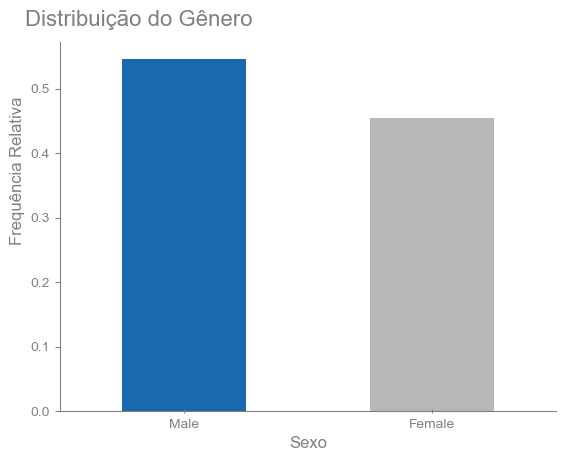

In [14]:
churn.gender.value_counts(normalize=True).plot.bar(rot = 0, color=[cmap_blue(200), cmap_gray(100)])

pos_title = {'x':0.16, 'y':1.02}
pos_lable_y = {'x':0.15, 'y':0.65}

plt.title("Distribuição do Gênero", fontdict=font_title, **pos_title)
plt.xlabel('Sexo', fontdict=font_label)
plt.ylabel('Frequência Relativa', fontdict=font_label, **pos_lable_y)

plt.show()

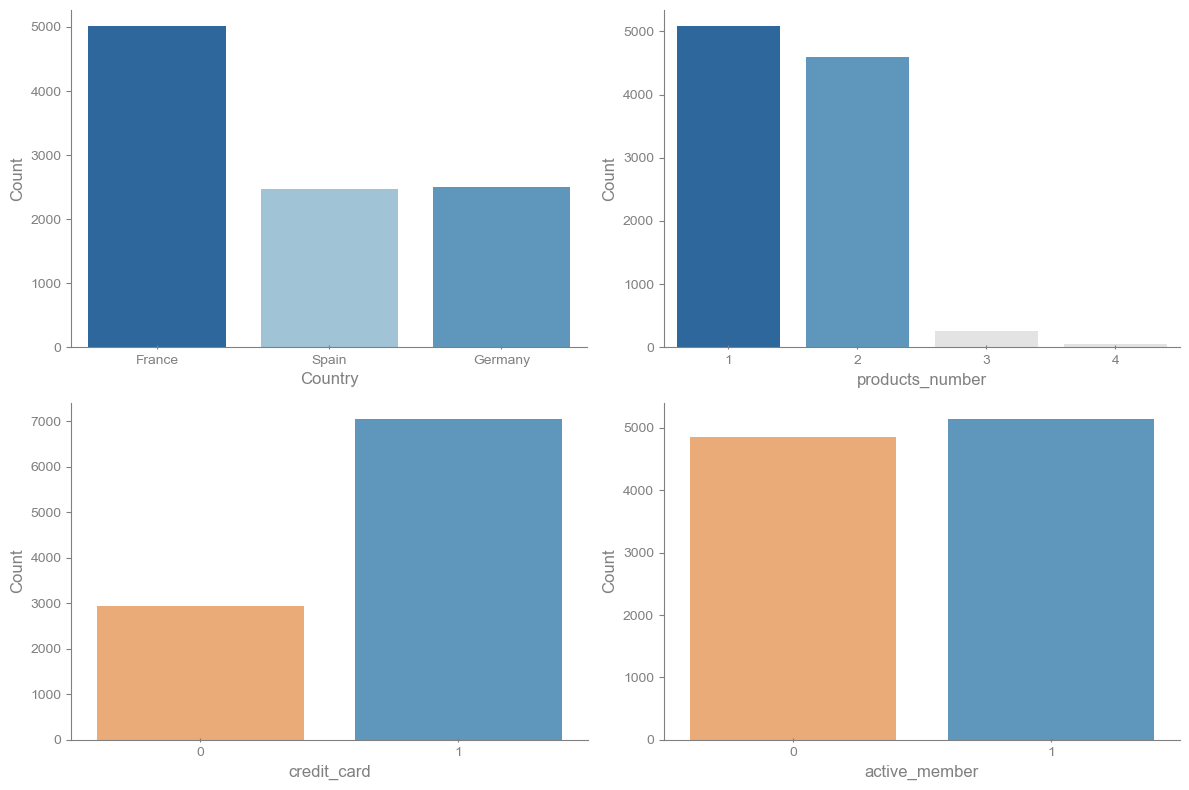

In [15]:
fig1, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=churn, x='country', ax=axes[0][0], palette=[cmap_blue(200), cmap_blue(100), cmap_blue(150),])
axes[0][0].set_xlabel('Country', fontdict=font_label)
axes[0][0].set_ylabel('Count', fontdict=font_label)

sns.countplot(data=churn, x='products_number', ax=axes[0][1], palette=[cmap_blue(200), cmap_blue(150), cmap_gray(50), cmap_gray(50)])
axes[0][1].set_xlabel('products_number', fontdict=font_label)
axes[0][1].set_ylabel('Count', fontdict=font_label)

sns.countplot(data=churn, x='credit_card', ax=axes[1][0], palette=[cmap_orange(100), cmap_blue(150)])
axes[1][0].set_xlabel('credit_card', fontdict=font_label)
axes[1][0].set_ylabel('Count', fontdict=font_label)

sns.countplot(data=churn, x='active_member', ax=axes[1][1], palette=[cmap_orange(100), cmap_blue(150)])
axes[1][1].set_xlabel('active_member', fontdict=font_label)
axes[1][1].set_ylabel('Count', fontdict=font_label)

plt.tight_layout()
plt.show()

OBSERVAÇÕES:
> 1. Nosso banco parece atuar com mais força na frança.
> 2. Vemos que nosso clientes possuem, em sua maioria, 1 ou 2 produtos.
> 3. A maioria dos clientes possui cartão de crédito.

## 3.3 Variável Numérica

* Como as idades(age), saldo(balance) e salário estimado(estimated_salary) estão distrbuidos?

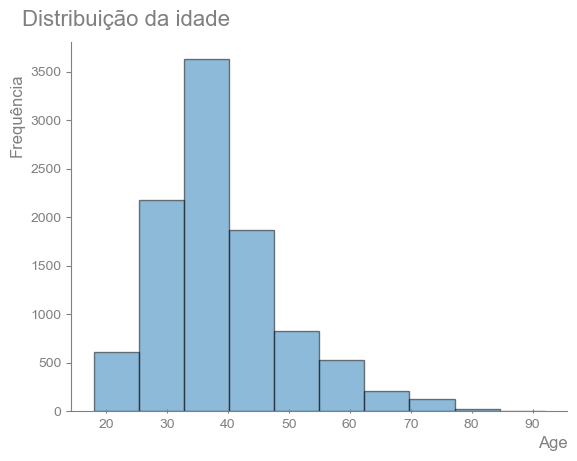

In [16]:
pos_label_x = {'x':0.97, 'y':1.02}
pos_label_y = {'x':0., 'y':0.8}
pos_title = {'x':0.11, 'y':1.02}

plt.hist(churn.age, edgecolor='k', alpha=0.5)
plt.title("Distribuição da idade", fontdict=font_title, **pos_title)
plt.xlabel('Age', fontdict=font_label, **pos_label_x)
plt.ylabel('Frequência', fontdict=font_label, **pos_label_y)
plt.show()

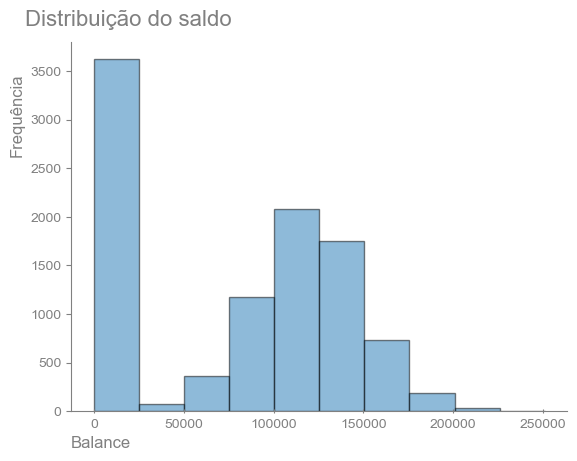

In [17]:
pos_label_x = {'x':0.06, 'y':1.02}
pos_label_y = {'x':0., 'y':0.8}
pos_title = {'x':0.115, 'y':1.02}

plt.hist(churn.balance, edgecolor='k', alpha=0.5)
plt.title("Distribuição do saldo", fontdict=font_title, **pos_title)
plt.xlabel('Balance', fontdict=font_label, **pos_label_x)
plt.ylabel('Frequência', fontdict=font_label, **pos_label_y)
plt.show()

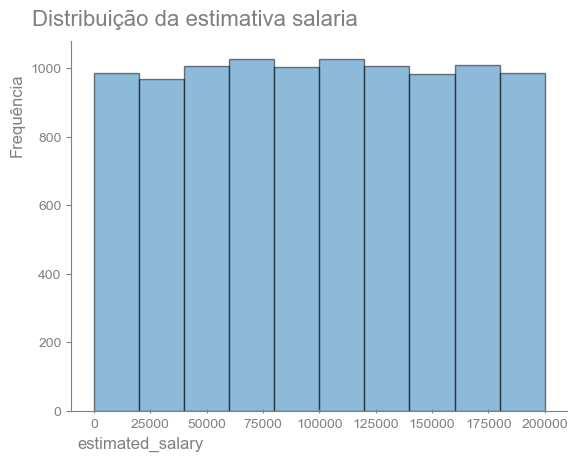

In [18]:
pos_label_x = {'x':0.14, 'y':1.02}
pos_label_y = {'x':0., 'y':0.8}
pos_title = {'x':0.25, 'y':1.02}

plt.hist(churn.estimated_salary, edgecolor='k', alpha=0.5)
plt.title("Distribuição da estimativa salaria", fontdict=font_title, **pos_title)
plt.xlabel('estimated_salary', fontdict=font_label, **pos_label_x)
plt.ylabel('Frequência', fontdict=font_label, **pos_label_y)
plt.show()

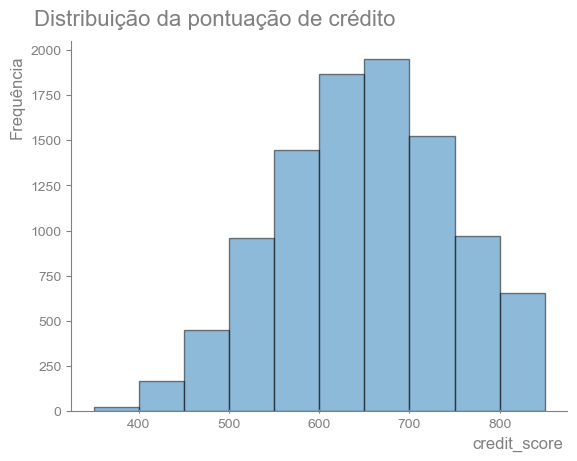

In [20]:
pos_label_x = {'x':0.9, 'y':1.02}
pos_label_y = {'x':0., 'y':0.85}
pos_title = {'x':0.29, 'y':1.02}

plt.hist(churn.credit_score, edgecolor='k', alpha=0.5)
plt.title("Distribuição da pontuação de crédito", fontdict=font_title, **pos_title)
plt.xlabel('credit_score', fontdict=font_label, **pos_label_x)
plt.ylabel('Frequência', fontdict=font_label, **pos_label_y)
plt.show()

OBSERVAÇÕES: 
> 1. **Age**: Possui uma distribuição assimétrica positiva(à direita). Isso significa que o dataet possui cliente poucos clientes com idades elevadas.
> 2. **Balance**: Possui uma distribuição assimétrica negativa(à esquerda).
> 3. **estiamted_salary**: Possui uma distribuição aproximadamente uniforme. Isso significa que a probabilidade de um cliente possuir uma estimativa salarial que esteja em qualquer uma das classes do histrograma é praticamente a mesma para todas elas.
> 4. **Credit_score**: Possui uma distribuição assimétrica negativa. Isso significa que a medida que o credit_score cresce, a frequência de clientes também tende a aumentar até o valor mediano. Após esse valor, ocorre descréscimos. Isso é bom, uma vez que a pontuação de crédito alta indica uma probabilidade de o cliente pagar as contas em dia.
___

## 3.3 Análise Multivariada

* a estimava salarial implica em maior saldo ou maior idade?

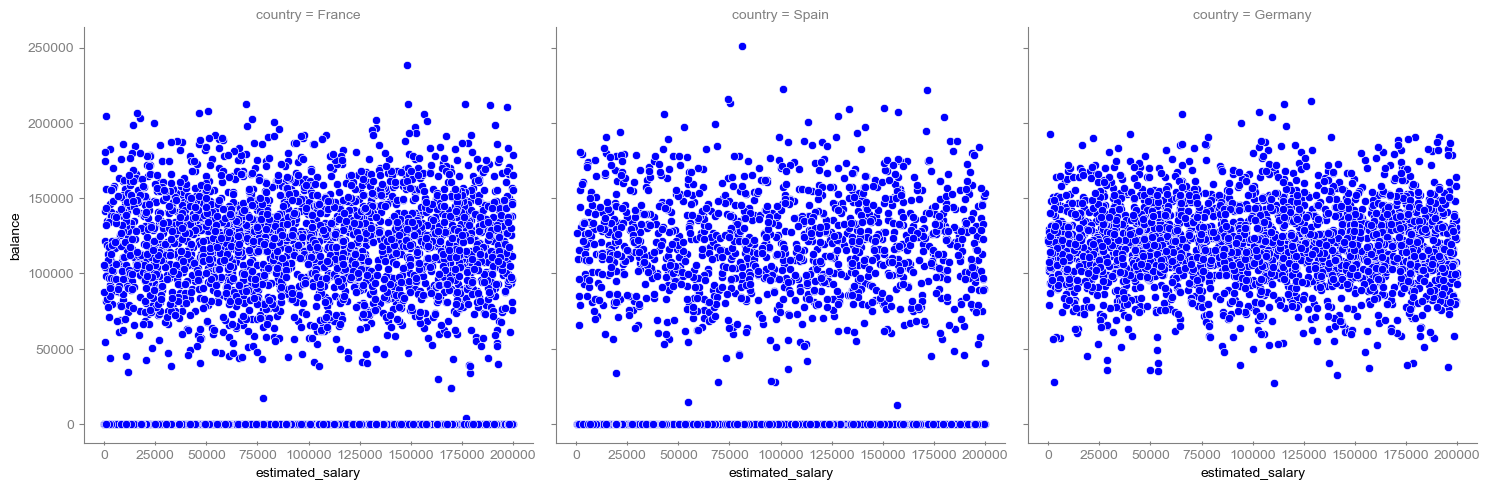

In [21]:
sns.relplot(x='estimated_salary', y='balance', data=churn, col='country', color='b')
plt.show()

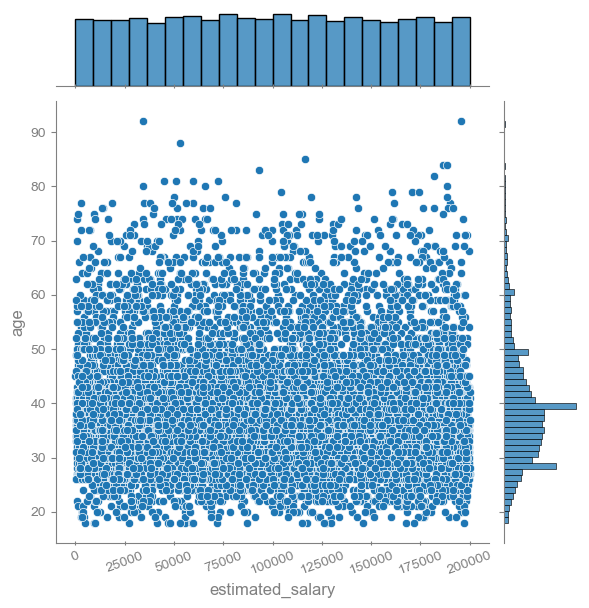

In [22]:
sns.jointplot(x='estimated_salary', y='age', data=churn)
plt.xlabel('estimated_salary', fontdict=font_label)
plt.ylabel('age', fontdict=font_label)
plt.xticks(range(0,200001, 25000), rotation=20)
plt.show()

OBSERVAÇÕES:
> 1. Curiosamente, vemos que o aumento da estimava salarial não implica em maior saldo.
> 2. Nota-se também que, o aumento da estimativa salarial não implica que o cliente terá uma idade mais alta.
___

## 3.4 Análise de Churn

In [23]:
churn.churn.value_counts(1).apply(lambda x: format_pct(x, 2))

# 0 -> 7963
# 1 -> 2037

0    79.63%
1    20.37%
Name: churn, dtype: object

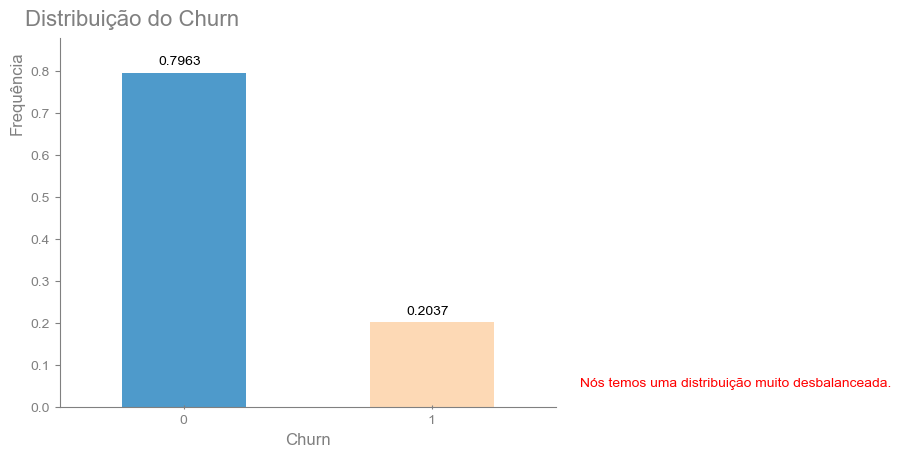

In [24]:
pos_title = {'x': 0.145, 'y':1.01}

churn.churn.value_counts(1).plot.bar(rot = 0, color=[cmap_blue(150), cmap_orange(50)])
plt.title('Distribuição do Churn', fontdict=font_title, **pos_title)
plt.xlabel('Churn', fontdict=font_label)
plt.ylabel('Frequência', fontdict=font_label, **pos_label_y)
plt.text(-0.1, 0.815, churn.churn.value_counts(1)[0])
plt.text(0.9, 0.22, churn.churn.value_counts(1)[1])
plt.ylim(0, 0.88)
plt.text(1.6, 0.05, "Nós temos uma distribuição muito desbalanceada.", color='r')
plt.show()

* Será que a idade do cliente influência em cancelarem a conta?

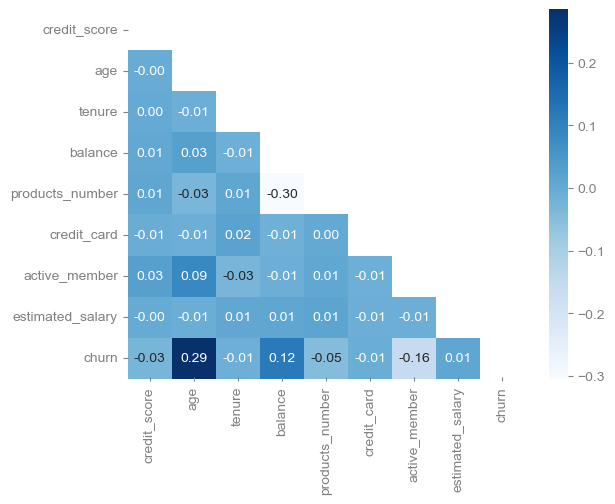

In [25]:
corr = churn.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, fmt='.2f', annot = True, cmap = 'Blues')
plt.show()

* Como se comporta o churn por gênero?

In [26]:
churn.groupby(['gender', 'churn']).agg({'churn':'count'}).rename(columns={'churn':'count'})

count
gender churn       
Female 0       3404
       1       1139
Male   0       4559
       1        898

In [27]:
# Sexo Feminino
churn.query("gender == 'Female'").churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    74.93%
1    25.07%
Name: churn, dtype: object

In [28]:
# Sexo Masculino
churn.query("gender == 'Male'").churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    83.54%
1    16.46%
Name: churn, dtype: object

* Qual a parcela de clientes que possuem cartão de crédito e mesmo assim deixaram o banco?

In [29]:
print('Possuem cartão de crédito')
posseum_cc_churn = churn.query('credit_card == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))
display(posseum_cc_churn)

print('\nNão Possuem cartão de crédito')
n_posseum_cc_churn = churn.query('credit_card == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))
display(n_posseum_cc_churn)

Possuem cartão de crédito


0    79.82%
1    20.18%
Name: churn, dtype: object


Não Possuem cartão de crédito


0    79.19%
1    20.81%
Name: churn, dtype: object

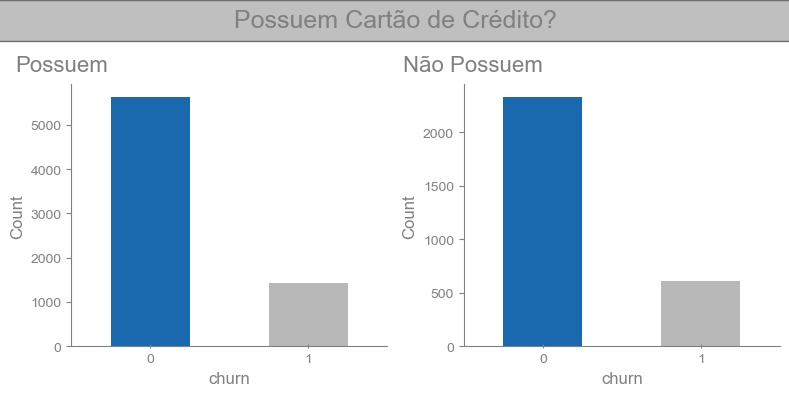

In [30]:
pos_title_1 = {'x':-0.03, 'y':1.02}
pos_title_2 = {'x': 0.03, 'y':1.02}
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}


fig, ax = plt.subplots(1,2, figsize=(8,4))
sup_title = plt.suptitle('Possuem Cartão de Crédito?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=11.9)

# plot 1
churn.query('credit_card == 1').churn.value_counts().plot.bar(ax=ax[0], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[0].set_title("Possuem", fontdict=font_title, **pos_title_1)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
churn.query('credit_card == 0').churn.value_counts().plot.bar(ax=ax[1], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[1].set_title("Não Possuem", fontdict=font_title, **pos_title_2)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

In [31]:
print('Possuem cartão e são da Alemanha:')
print(churn[(churn['credit_card'] == 1) & (churn['country'] == 'Germany')].churn.value_counts(1).apply(lambda x: format_pct(x, 2)))

# churn = 0 -> 1214
# churn = 1 -> 577


print('\n\nNão possuem cartão e são da Alemanha:', )
churn[(churn['credit_card'] == 0) & (churn['country'] == 'Germany')].churn.value_counts(1).apply(lambda x: format_pct(x, 2))
# churn = 0 -> 481
# churn = 1 -> 237

Possuem cartão e são da Alemanha:
0    67.78%
1    32.22%
Name: churn, dtype: object


Não possuem cartão e são da Alemanha:


0    66.99%
1    33.01%
Name: churn, dtype: object

In [32]:
print('Possuem cartão e são da França:')
print(churn[(churn['credit_card'] == 1) & (churn['country'] == 'France')].churn.value_counts(1).apply(lambda x: format_pct(x, 2)))

# churn = 0 -> 2974
# churn = 1 -> 569


print('\n\nNão Possuem cartão e são da França:')
churn[(churn['credit_card'] == 0) & (churn['country'] == 'France')].churn.value_counts(1).apply(lambda x: format_pct(x, 2))
# churn = 0 -> 1230
# churn = 1 -> 241

Possuem cartão e são da França:
0    83.94%
1    16.06%
Name: churn, dtype: object


Não Possuem cartão e são da França:


0    83.62%
1    16.38%
Name: churn, dtype: object

In [33]:
print('Possuem cartão e são da Espanha:')
print(churn[(churn['credit_card'] == 1) & (churn['country'] == 'Spain')].churn.value_counts(1).apply(lambda x: format_pct(x, 2)))

# churn = 0 -> 1443
# churn = 1 -> 278

print('\n\nNão Possuem cartão e são da Espanha:')
print(churn[(churn['credit_card'] == 0) & (churn['country'] == 'Spain')].churn.value_counts(1).apply(lambda x: format_pct(x, 2)))

# churn = 0 -> 621
# churn = 1 -> 135

Possuem cartão e são da Espanha:
0    83.85%
1    16.15%
Name: churn, dtype: object


Não Possuem cartão e são da Espanha:
0    82.14%
1    17.86%
Name: churn, dtype: object


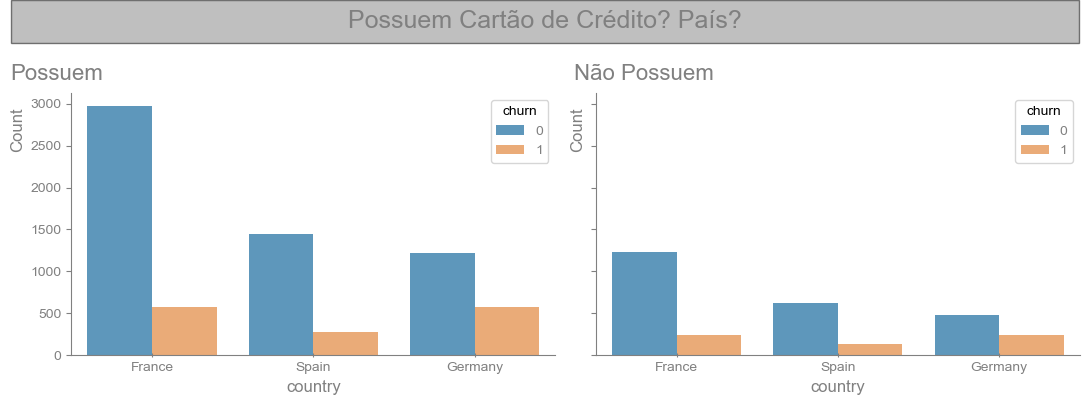

In [34]:
pos_label_y = {'y':0.86}
pos_title_1 = {'x':-0.03, 'y':1.02}
pos_title_2 = {'x': 0.1, 'y':1.02}
pos_sup_title = {'x': 0.5, 'y':1.0, 'size':18}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

order_by = ['France', 'Spain', 'Germany']
order_color = [cmap_blue(150), cmap_orange(100)]


# Criação dos plot e ajuste do sup_title
fig, ax = plt.subplots(1,2, figsize=(11,4), sharey=True)
sup_title = plt.suptitle('Possuem Cartão de Crédito? País?', fontdict=font_sup_title, bbox=bbox, **pos_sup_title)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13.5)

# plot 1
sns.countplot(data=churn.query('credit_card == 1'), x='country', hue='churn', order=order_by, palette=order_color, ax=ax[0])
ax[0].set_title("Possuem", fontdict=font_title, **pos_title_1)
ax[0].set_xlabel('country', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label, **pos_label_y)

# plot 2
sns.countplot(data=churn.query('credit_card == 0'), x='country', hue='churn', order=order_by, palette=order_color, ax=ax[1])
ax[1].set_title("Não Possuem", fontdict=font_title, **pos_title_2)
ax[1].set_xlabel('country', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label, **pos_label_y)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

OBSERVAÇÕES:
> 1. Analisando a variável churn, percebe-se que ela tem uma distribuição muito desbalanceada.
> 2. A variável idade e a churn possui uma correlação de pearson positiva fraca. Isso implica, que clientes com idades mais velhos tendem a cancelarem a conta.
> 3. Aparentemente, as mulheres estão mais propensas a cancelarem suas contas com o banco.
> 4. Em termos relativo, a taxa de churn para os clientes que possuem ou não cartão de crédito é, aproximadamente, igual. Cerca de 20%. Isso mostra que, possuir ou não cartão de crédito, aparentemente, não faz com que os clientes deixem o banco.
> 5. Analisando por país, vale destacar que na Alemanha é onde ocorre a maior taxa de churn, seja para os clientes que possua ou não cartão de crédito.

* Qual o padrão do credit_score(pontuação de crédito) dos clientes que deram churn?

In [35]:
churn[['credit_score', 'country', 'churn']].groupby(['country', 'churn']).agg({'credit_score':'mean'}).unstack()

credit_score        
churn              0       1
country                     
France        651.16  641.91
Germany       653.26  647.69
Spain         652.10  647.48

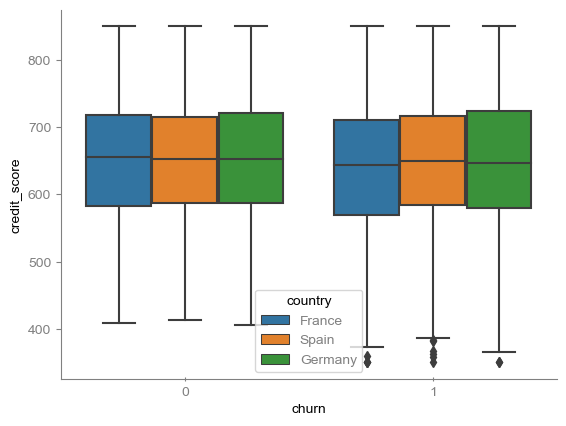

In [36]:
sns.boxplot(data=churn, x='churn', y='credit_score', hue='country')
plt.show()

OBSERVAÇÃO:
> 1. Aparentemente, o credit_score não tem relação com o churn. Analisando o boxplot gerado acima, percebe-se que a média do credit_score das pessoas que deixaram o banco e das que não deixaram é aproximadamente igual.
___

* A taxa de churn é maior para quem consomem mais produtos do banco?

In [37]:
churn_product = churn.groupby(['products_number', 'churn']).agg({'churn':'count'}).rename(columns={'churn':'frequência'})
display(churn_product)

taxa_churn_product1 = churn_product.loc[(1,1)][0]/(churn_product.loc[(1,1)][0] + churn_product.loc[(1,0)][0])
taxa_churn_product2 = churn_product.loc[(2,1)][0]/(churn_product.loc[(2,1)][0] + churn_product.loc[(2,0)][0])
taxa_churn_product3 = churn_product.loc[(3,1)][0]/(churn_product.loc[(3,1)][0] + churn_product.loc[(3,0)][0])
taxa_churn_product4 = churn_product.loc[(4,1)][0]/(churn_product.loc[(4,1)][0])

print(f'taxa de churn de 1 produto: {taxa_churn_product1:.2%}')
print(f'taxa de churn do 2 produto: {taxa_churn_product2:.2%}')
print(f'taxa de churn do 3 produto: {taxa_churn_product3:.2%}')
print(f'taxa de churn do 4 produto: {taxa_churn_product4:.2%}')

frequência
products_number churn            
1               0            3675
                1            1409
2               0            4242
                1             348
3               0              46
                1             220
4               1              60

taxa de churn de 1 produto: 27.71%
taxa de churn do 2 produto: 7.58%
taxa de churn do 3 produto: 82.71%
taxa de churn do 4 produto: 100.00%


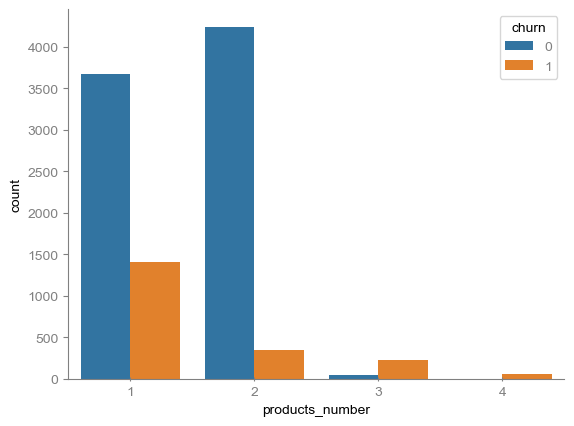

In [38]:
sns.countplot(data=churn, x='products_number', hue='churn')
plt.show()

OBSERVAÇÕES:
> 1. Normalmente os clientes consomem 1 ou 2 produtos do banco. Entretanto, quem consome um produto tem uma taxa de churn maior que a dos clientes que consome dois produtos. Vale destacar, que os clientes que consomem dois produtos estão em maior quantidade, em termos absoluto, do que quem consome apenas um.
> 2. A frequência de clientes que consome quatro produtos do Banco é a menor. Além disso, a taxa de churn desses clientes foi 100%. 
> 3. Os clientes que consomem três produtos, também está em menor quantidade. Além disso, possui a segunta maior taxa de churn, cerca de 82.71%.
___

* Qual o percentual de pessoas que eram ativas(active_member)? das que eram ativas e mesmo assim deram churn? Isso varia de acordo com o país?

In [39]:
# Membros que são ativas
churn.query('active_member == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

# 0 -> 4416
# 1 -> 735

0    85.73%
1    14.27%
Name: churn, dtype: object

In [40]:
# Membros que não são ativas
churn.query('active_member == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

# 0 -> 3547
# 1 -> 1302

0    73.15%
1    26.85%
Name: churn, dtype: object

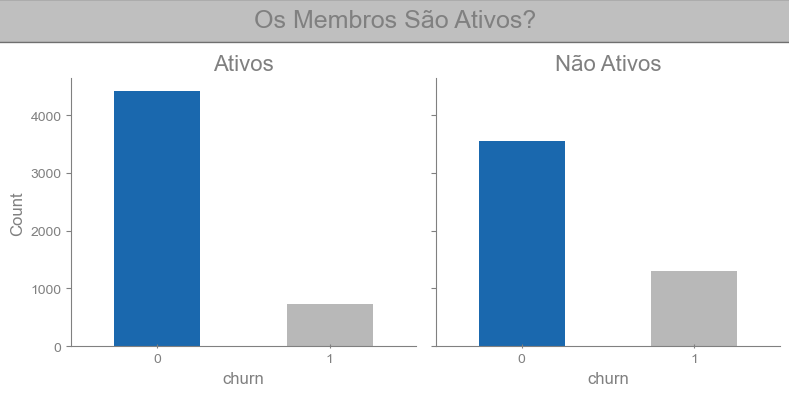

In [41]:
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}


fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
sup_title = plt.suptitle('Os Membros São Ativos?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1
churn.query('active_member == 1').churn.value_counts().plot.bar(ax=ax[0], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[0].set_title("Ativos", fontdict=font_title)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
churn.query('active_member == 0').churn.value_counts().plot.bar(ax=ax[1], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[1].set_title("Não Ativos", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

In [42]:
df_churn = churn.copy()
df_churn['active_member'] = df_churn['active_member'].replace({0:'N', 1:'Y'})
df_churn['churn'] = df_churn['churn'].replace({0:'N', 1:'Y'})
(df_churn.replace()).groupby(['country', 'active_member', 'churn']).agg({'churn':'count'}).rename(columns={'churn':'frequência'}).stb.subtotal()

frequência
country     active_member      churn                             
France      N                  N                             1911
                               Y                              512
                               France | N - subtotal         2423
            Y                  N                             2293
                               Y                              298
                               France | Y - subtotal         2591
            France - subtotal                                5014
Germany     N                  N                              743
                               Y                              518
                               Germany | N - subtotal        1261
            Y                  N                              952
                               Y                              296
                               Germany | Y - subtotal        1248
            Germany - subtotal                               2509
Spain       N                  N                              893
                               Y                              272
                               Spain | N - subtotal          1165
            Y                  N                             1171
                               Y                              141
                               Spain | Y - subtotal          1312
            Spain - subtotal                                 2477
grand_total                                                 10000

In [43]:
taxa_churn_N_Y_alemanha = 518/(518 + 743)
print(f'Taxa de churn da Alemanha: {taxa_churn_N_Y_alemanha:.2%}')

Taxa de churn da Alemanha: 41.08%


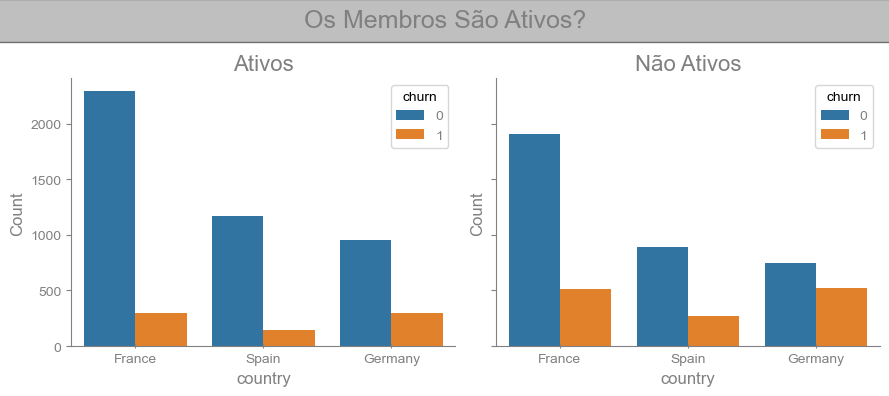

In [44]:
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)
sup_title = plt.suptitle('Os Membros São Ativos?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1
sns.countplot(data=churn.query('active_member == 1'), x='country', hue='churn', ax=ax[0])
ax[0].set_title("Ativos", fontdict=font_title)
ax[0].set_xlabel('country', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
sns.countplot(data=churn.query('active_member == 0'), x='country', hue='churn', ax=ax[1])
ax[1].set_title("Não Ativos", fontdict=font_title)
ax[1].set_xlabel('country', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

OBSERVAÇÕES:
> 1. Para os membros que são ativos, a taxa de churn é menor, aproximadamente 14%. Diferentemente dos não ativos, que possui uma taxa de churn de aproximadamente 26%. Uma boa ideia seria identificar alguma medida para manter os membros ativos.
> 2. Na alemanha, a taxa de churn relativa tanto para membros ativos e não ativos é maior. A taxa de churn dos membros não ativos é cerca de 41%. Seria legal eleborar uma estratégia para tornar os membros da Alemanha mais ativos e verificar se diminuiria a taxa de churn.
___

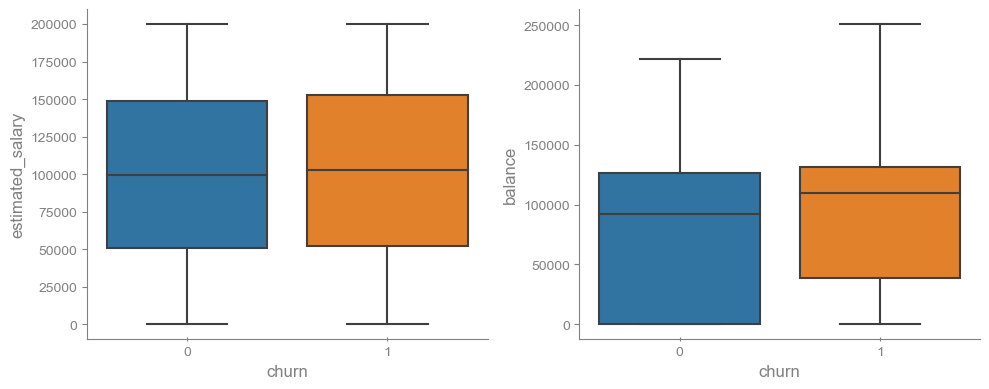

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=churn, x = 'churn', y='estimated_salary', ax=ax[0])
ax[0].set_xlabel('churn', fontdict=font_label, color='gray')
ax[0].set_ylabel('estimated_salary', fontdict=font_label)

sns.boxplot(data=churn, x = 'churn', y='balance', ax=ax[1])
ax[1].set_xlabel('churn', fontdict=font_label, color='gray')
ax[1].set_ylabel('balance', fontdict=font_label)

fig.tight_layout()
plt.show()

OBSERVAÇÕES:
> 1. Aparentemente, o salário não é um bom preditor de churn.
> 2. Por outro lado, parece que o saldo tem alguma relação com o churn. As pessoas que dão churn possuem saldo maior do que quem não dá churn.
___

In [46]:
churn.groupby('churn')['balance'].median()

churn
0     92072.68
1    109349.29
Name: balance, dtype: float64

In [47]:
churn.groupby('churn').agg({'balance':['mean', 'median']})

balance           
           mean     median
churn                     
0      72745.30   92072.68
1      91108.54  109349.29

In [48]:
agg_func = {
    'estimated_salary':['min', 'median', 'mean', 'std', skew],
    'balance':['min', 'median', 'mean', 'std', skew],
    'age':['min', 'median', 'mean', 'std', skew]
}

churn.groupby('churn').agg(agg_func)

estimated_salary                                       balance  \
                   min     median       mean       std  skew     min   
churn                                                                  
0                90.07   99645.04   99738.39  57405.59  0.01     0.0   
1                11.58  102460.84  101465.68  57912.42 -0.03     0.0   

                                           age                             
          median      mean       std  skew min median   mean    std  skew  
churn                                                                      
0       92072.68  72745.30  62848.04 -0.05  18   36.0  37.41  10.13  1.38  
1      109349.29  91108.54  58360.79 -0.51  18   45.0  44.84   9.76  0.08

* Como será que varia o churn de acordo com o país?

In [49]:
churn.groupby('country')['churn'].value_counts()

country  churn
France   0        4204
         1         810
Germany  0        1695
         1         814
Spain    0        2064
         1         413
Name: churn, dtype: int64

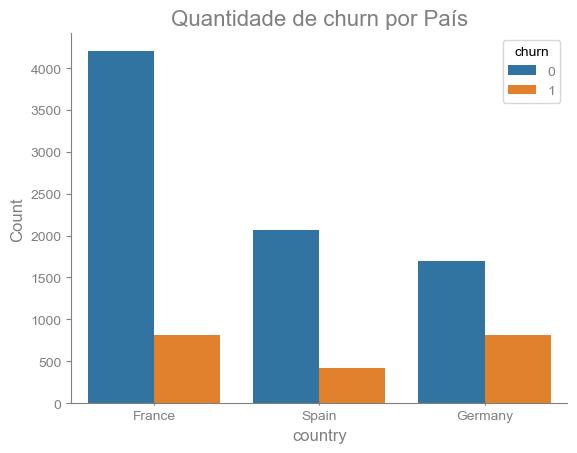

In [50]:
sns.countplot(data=churn, x='country', hue='churn')
plt.title("Quantidade de churn por País", fontdict=font_title)
plt.xlabel('country', fontdict=font_label)
plt.ylabel('Count', fontdict=font_label)
plt.show()

In [51]:
churn.groupby('country')['churn'].mean().sort_values()

country
France     0.16
Spain      0.17
Germany    0.32
Name: churn, dtype: float64

* Quem possui conta no Banco acima de 5 anos, possui uma menor taxa de churn, quando comparado a quem possui menos?

In [52]:
churn.query('tenure >= 5').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    80.15%
1    19.85%
Name: churn, dtype: object

In [53]:
churn.query('tenure < 5').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    78.99%
1    21.01%
Name: churn, dtype: object

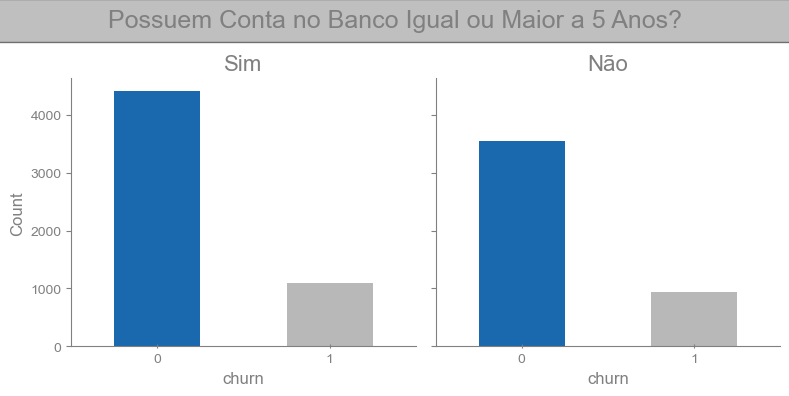

In [54]:
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}


fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
sup_title = plt.suptitle('Possuem Conta no Banco Igual ou Maior a 5 Anos?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1
churn.query('tenure >= 5').churn.value_counts().plot.bar(ax=ax[0], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[0].set_title("Sim", fontdict=font_title)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
churn.query('tenure < 5').churn.value_counts().plot.bar(ax=ax[1], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[1].set_title("Não", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

In [55]:
churn.query('tenure >= 5 & active_member == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    86.25%
1    13.75%
Name: churn, dtype: object

In [56]:
churn.query('tenure >= 5 & active_member == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    73.93%
1    26.07%
Name: churn, dtype: object

In [57]:
churn.query('tenure < 5 & active_member == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    85.12%
1    14.88%
Name: churn, dtype: object

In [58]:
churn.query('tenure < 5 & active_member == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

0    72.15%
1    27.85%
Name: churn, dtype: object

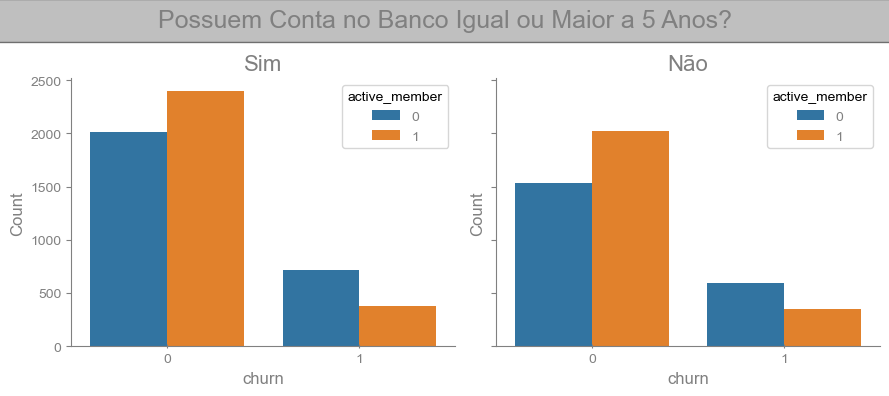

In [59]:
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)
sup_title = plt.suptitle('Possuem Conta no Banco Igual ou Maior a 5 Anos?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1
sns.countplot(data=churn.query('tenure >= 5'), x='churn', hue='active_member', ax=ax[0])
ax[0].set_title("Sim", fontdict=font_title)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
sns.countplot(data=churn.query('tenure < 5'), x='churn', hue='active_member', ax=ax[1])
ax[1].set_title("Não", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

OBSERVAÇÕES: 
> 1. Aparentemente, clientes que possuem conta a mais tempo no banco, possuem menor taxa de churn.
> 2. Os cliente que possui conta há mais tempo no Banco e são ativos, são os que menos cancelam suas contas. Possuem taxa de churn aproximadamente 13,7%.
___

* Saldo igual a zero, implica em mais churn? e das pessoas que possuem saldo maior que zero?

In [60]:
customer_balance_0 = len(churn.query('balance == 0'))
total_customer = len(churn)
p_sem_saldo = customer_balance_0/total_customer
print(f'Sem saldo: {p_sem_saldo:.2%}')

Sem saldo: 36.17%


In [61]:
churn_sem_saldo = churn.query('balance == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

print(f'Dos {p_sem_saldo:.2%} de cliente sem saldo:')
print(f'  * {churn_sem_saldo.loc[0]} não deram churn')
print(f'  * {churn_sem_saldo.loc[1]} deram churn')

Dos 36.17% de cliente sem saldo:
  * 86.18% não deram churn
  * 13.82% deram churn


In [62]:
churn_tem_saldo = churn.query('balance > 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

print(f'Dos {1 - p_sem_saldo:.2%} de cliente que possui saldo maior que zero:')
print(f'  * {churn_tem_saldo.loc[0]} não deram churn')
print(f'  * {churn_tem_saldo.loc[1]} deram churn')

Dos 63.83% de cliente que possui saldo maior que zero:
  * 75.92% não deram churn
  * 24.08% deram churn


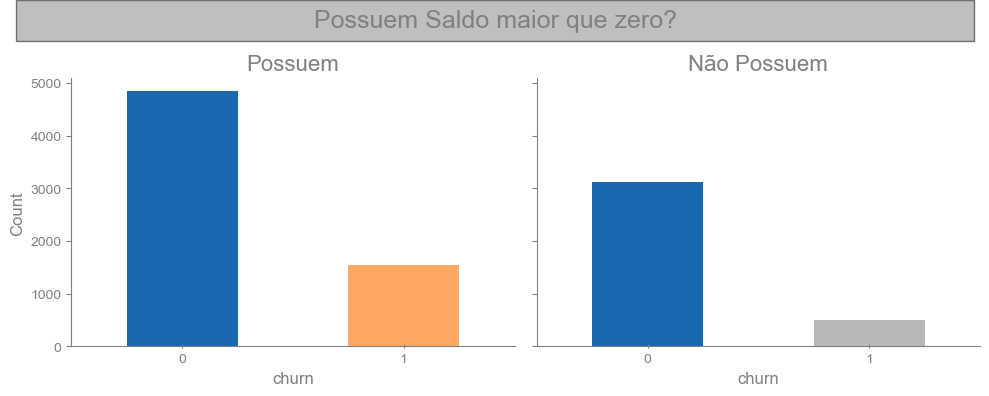

In [63]:
pos_title_1 = {'x':-0.03, 'y':1.02}
pos_title_2 = {'x': 0.03, 'y':1.02}
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
sup_title = plt.suptitle('Possuem Saldo maior que zero?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=11.9)

# plot 1
churn.query('balance > 0').churn.value_counts().plot.bar(ax=ax[0], color=[cmap_blue(200), cmap_orange(100)], rot=0)
ax[0].set_title("Possuem", fontdict=font_title)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
churn.query('balance == 0').churn.value_counts().plot.bar(ax=ax[1], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[1].set_title("Não Possuem", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
plt.show()

OBSERVAÇÕES:
> 1. Temos 36.17% de nossos cliente não tem saldo.
> 2. Curiosamente, a taxa de churn dos clientes que não possuem saldo é menor do que a taxa de churn dos clientes que possuem saldo maior que zero.
___

# 4. Conclusão

A análise acima buscou entender quais as variáveis que estão relacionadas ao churn.

> * Vimos que clientes com saldo maior estão mais propensos ao churn.
> * Curiosamente, vemos que o aumento da estimava salarial não implica em maior saldo.
> * Nota-se também que, o aumento da estimativa salarial não implica que o cliente terá uma idade avançada.
> * Dos clientes que possuem cartão de crédito e são da Alemanha, aproximadamente 32% deixaram o banco. Enquanto os que são da França e possuem cartão de crédito, aproximadamente 16% delas deixaram o banco. Vale apena destacar que os cliente que possuem cartão de crédtio e são da França é mais que dobro da Alemanha. Porém, em termos absolutos, o número de churn na Alemanha é maior que na France. Seria muito interessante verificar e comparar as característica da França com as da Alemanha.
> * Em termos relativos, a situação das pessoas que não possuem cartão de crédito e é de tal país, é aproximadamente, igual a situação das pessoas que possuem cartão.
> * Analisando a variável churn, percebe-se que ela tem uma distribuição muito desbalanceada. O que pode afetar um possível modelo que tenha como variável alvo o churn.
> * Clientes mais velhos tendem a cancelarem sua conta com o banco.
> * A taxa de churn para o sexo feminimo é maior que no masculino.
> * Em termos relativo, a taxa de churn para os clientes que possuem ou não cartão de crédito é, aproximadamente, igual. Cerca de 20%. Isso mostra que, possuir ou não cartão de crédito, aparentemente, não faz com que os clientes deixem o banco.
> * Analisando por país, vale destacar que na Alemanha é onde ocorre a maior taxa de churn, seja para os clientes que possua ou não cartão de crédito.
> * Aparentemente, o credit_score não tem relação com o churn
> * Normalmente os clientes consomem um ou dois produtos do banco. Entretanto, quem consome um produto tem uma taxa de churn maior que a dos clientes que consome dois produtos(que possui a menor taxa de churn). Vale destacar, que os clientes que consomem dois produtos estão em maior quantidade, em termos absoluto, do que quem consome apenas um.
> * A frequência de clientes que consome quatro produtos do Banco é a menor. Além disso, a taxa de churn desses clientes foi 100%. Seria interessante verifica isso.
> * Os clientes que consomem três produtos, também está em menor quantidade. Além disso, possui a segunta maior taxa de churn, cerca de 82.71%.
> * Para os membros que são ativos, a taxa de churn é menor, aproximadamente 14%. Diferentemente dos não ativos, que possui uma taxa de churn de aproximadamente 26%. Uma boa ideia seria identificar alguma medida para manter os membros ativos.
> * Na alemanha, a taxa de churn relativa tanto para membros ativos e não ativos é maior. A taxa de churn dos membros não ativos é cerca de 41%. Seria legal eleborar uma estratégia para tornar os membros da Alemanha mais ativos e verificar se diminuiria a taxa de churn.
> * Aparentemente, o salário não é um bom preditor de churn.
> * Por outro lado, parece que o saldo tem alguma relação com o churn. As pessoas que dão churn possuem saldo maior do que quem não dá churn.
> * Na Alemanha é onde ocorre o maior de churn. O que será que pode está afetando a operação do banco nesse país? Como foi 
visto no ínicio, alguns dos fatores que podem afetar o churn é a insastisfação do cliente, concorrentes, a qualidade do produto 
e entre outros fatores. Uma análise nesse sentido seria interessante.
> * A taxa de churn dos clientes que não possuem saldo é menor do que a taxa de churn dos clientes que possuem saldo maior que zero.
> * Aparentemente, clientes que possuem conta a mais tempo no banco, possuem menor taxa de churn.
> * Os cliente que possui conta há mais tempo no Banco e são ativos, são os que menos cancelam suas contas. Possuem taxa de churn aproximadamente 13,7%.

# 5. Referências

Link 01: [CHURN: você sabe como calcular a taxa de cancelamento de clientes?](https://www.cortex-intelligence.com/blog/vendas/como-calcular-churn-de-clientes)